In [1]:
# !export http_proxy=127.0.0.1:8123
# !export https_proxy=127.0.0.1:8123

In [2]:
from selenium import webdriver
import time

In [3]:
options = webdriver.ChromeOptions()
# MacOS
# options.binary_location = '/Applications/Google Chrome.app/Contents/MacOS/Google Chrome'
# Linux
options.binary_location = '/usr/bin/google-chrome-stable'
options.add_argument('headless')
options.add_argument('window-size=1200x600')
driver = webdriver.Chrome(chrome_options=options)

In [4]:
# https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python
driver.get('https://image.baidu.com/search/index?tn=baiduimage&ipn=r&ct=201326592&cl=2&lm=-1&st=-1&fm=index&fr=&hs=0&xthttps=111111&sf=1&fmq=&pv=&ic=0&nc=1&z=&se=1&showtab=0&fb=0&width=&height=&face=0&istype=2&ie=utf-8&word=%E9%A3%8E%E6%99%AF')
SCROLL_PAUSE_TIME = 1

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    print("scroll down event")
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

scroll down event
scroll down event
scroll down event
scroll down event


In [5]:
# driver.get('https://www.google.com/imghp?hl=en&tab=wi&authuser=0')
# chrome extension, get xpath of element, http://selectorgadget.com/
# search = driver.find_element_by_css_selector('input#lst-ib')
# click = driver.find_element_by_css_selector('#sfdiv :nth-child(1)')
# search.send_keys("golang")
# click.click()

In [6]:
driver.get_screenshot_as_file('main-page2.png')

True

![title](main-page2.png)

In [7]:
elem = driver.find_element_by_xpath("//*")
source_code = elem.get_attribute("outerHTML")

'<html><head><script async="" src="https://fex.bdstatic.com/hunter/alog/dp.min.js?v=-17617-17617"></script><script async="" src="https://fex.bdstatic.com/hunter/alog/alog.min.js?v=-17617-17617"></script><script async="" src="https://fex.bdstatic.com/hunter/alog/alog.min.js?v=-17617-17617"></script><script>\n    (function (context) {\n        var data = {};\n        var url = \'//imgstat.baidu.com/17.gif\';\n        var start = +new Date;\n        var createQuery = function (data) {\n            var ret = [];\n            for (var key in data) {\n                ret.push(key + \'=\' + data[key]);\n            }\n            return ret.join(\'&\');\n        };\n\n        var _mergeCommPara = function (data) {\n            data.etype = \'speed\';\n            data.page = \'result\';\n            data.logid = "14475019240498747623";\n            data.sid = \'b8c13b15862f67f2419d56991d99945a1fe22f83\';\n            data.wh = window.screen.width + \'x\' + window.screen.height ;\n            
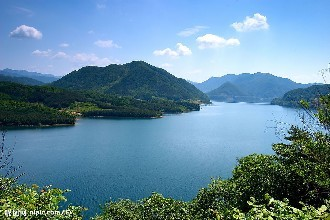
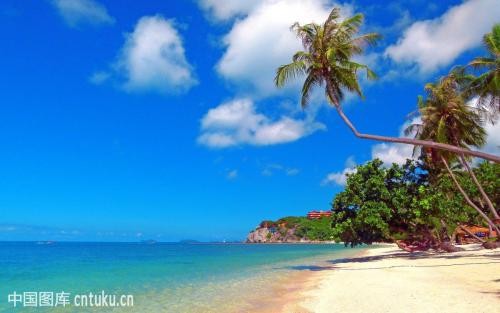
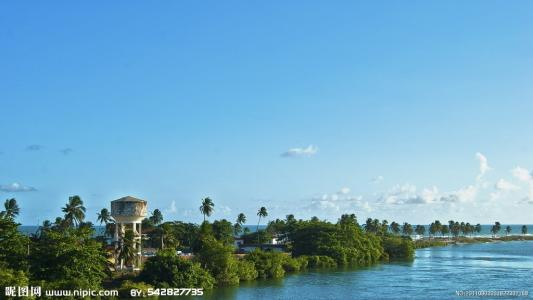
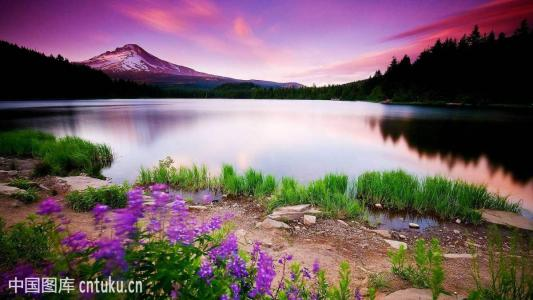
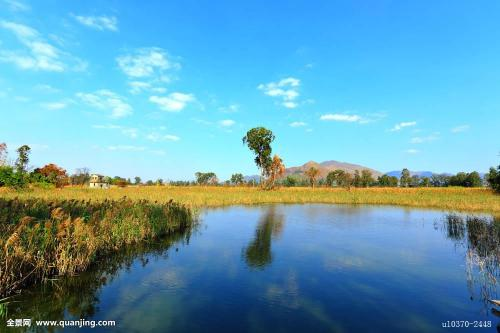
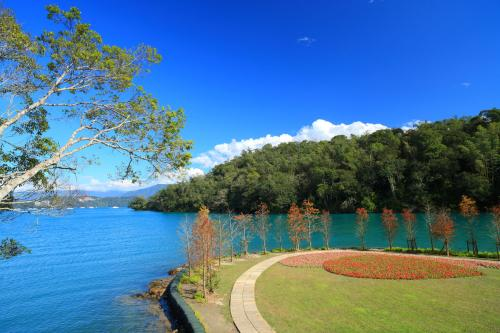
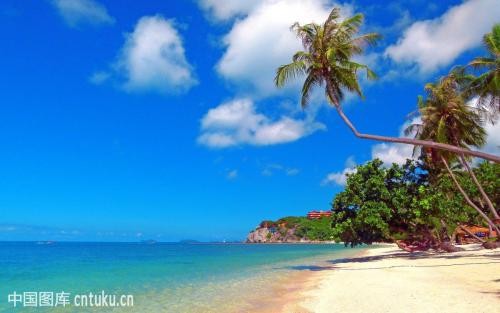
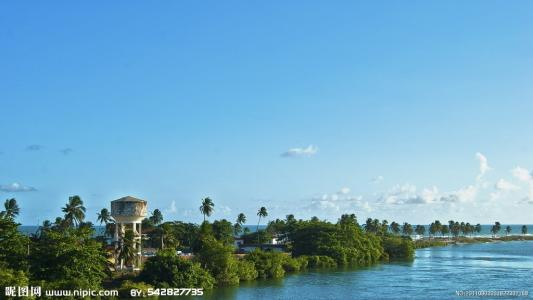
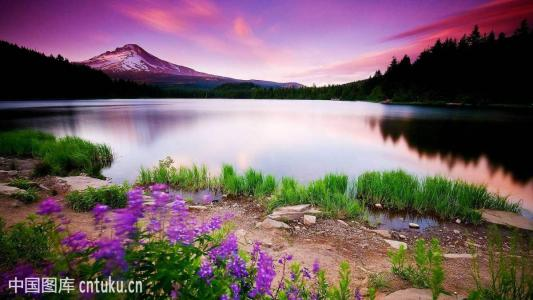
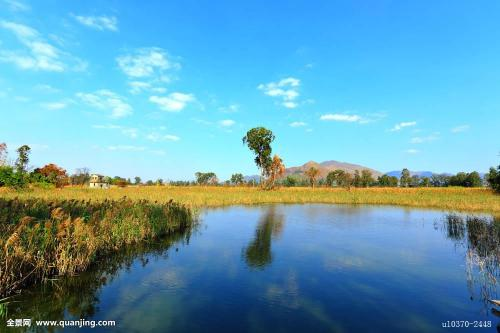
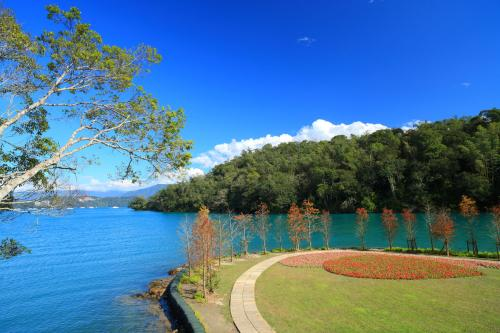

In [8]:
source_code

In [9]:
pow(62,6)

56800235584

In [10]:
62**6

56800235584

In [11]:
# 26*2+10 = 62
ks = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"

In [12]:
def gen_code(n):
    c = ""
    for i in range(6):
        c += ks[int(n%62)]
        n = n / 62    
    return c

In [13]:
gen_code(100000000)

'ezAL60'

In [14]:
# 62进制

def key_generator():
    for n in range(100000000,62**6):
        yield gen_code(n)